# Mixture of conjugate priors

In [1]:
import numpy as np
from scipy.special import gamma
from scipy.stats import beta
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

$$
    p(\theta) = \frac{1}{2}\text{Beta}(10, 20) + \frac{1}{2}\text{Beta}(20, 10)
$$

Suppose we observe 3 heads and 7 tails in 10 spins. Then

$$
    p_i(x) = \frac{\Gamma(\alpha_1 + \beta_1)}{\Gamma(\alpha_1) \Gamma(\beta_1)} \frac{\Gamma\left(\alpha_1 + \sum_n x_n\right) \Gamma\left(\alpha_1 + N - \sum_n x_n\right)}{\Gamma(\alpha_1 + \beta_1 + N)}
$$

This follows from the fact that

$$
\begin{aligned}
    p_i(x) &= \int p_i(\theta) p({\bf x}\vert \theta) d\theta\\
           &= \int \text{Beta}(\theta\vert\alpha_i, \beta_i) \theta^{\sum_n x_n} (1-\theta)^{N - \sum_n x_n} d\theta\\
           &= \frac{\Gamma(\alpha_i + \beta_i)}{\Gamma(\alpha_i) \Gamma(\beta_i)} \int \theta^{\alpha + \sum_n x_n - 1} (1 -\theta)^{\beta + N - \sum_n} d\theta\\
           &= \frac{\Gamma(\alpha_i + \beta_i)}{\Gamma(\alpha_i) \Gamma(\beta_i)} \frac{\Gamma\left(\alpha_i + \sum_n x_n\right) \Gamma\left(\beta_i + N - \sum_n x_n\right)}{\Gamma(\alpha_i + \beta_i + N)}
\end{aligned}
$$

In [3]:
def marginal_p(α, β, x, N):
    """
    The marginal likelihood of a bernoulli distribution
    with gamma(α, β) prior
    
    Parameters
    ----------
    α: float
        Prior α-hyperparameter
    β: float
        Prior β-hyperparameter
    x: int
        Total number of positive observations
    N: int
        Total number of observations
    """
    num = gamma(α + β) * gamma(α + x) * gamma(β + N - x)
    den = gamma(α) * gamma(β) * gamma(α + β + N)
    return num / den

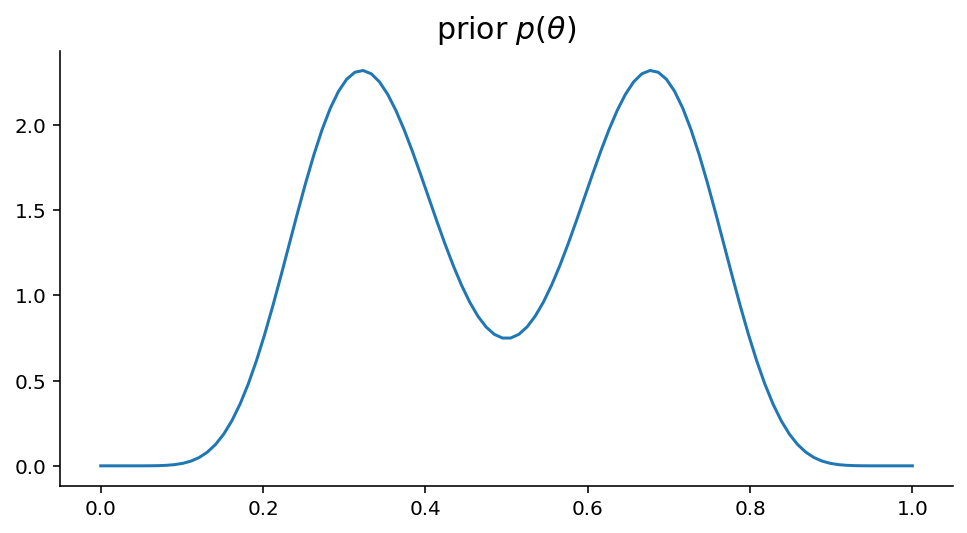

In [12]:
α1, β1 = 10, 20
α2, β2 = 20, 10

π1 = 0.5
π2 = 1 - π1

def p(θ, π1, π2, α1, α2, β1, β2):
    return π1 * beta(α1, α2).pdf(θ) + π2 * beta(α2, β2).pdf(θ)

θ_range = np.linspace(0, 1, 100)
plt.plot(θ_range, p(θ_range, π1, π2, α1, α2, β1, β2))
plt.title(r"prior $p(\theta)$", fontsize=15);

In [13]:
N = 10
Σxn = 3

p1 = marginal_p(α1, β1, Σxn, N)
p2 = marginal_p(α2, β2, Σxn, N)

π1_post = π1 * p1 / (π1 * p1 + π2 * p2)
π2_post = 1 - π1_post 

In [8]:
π1_post, π2_post

(0.8914728682170543, 0.10852713178294571)

In [9]:
α1_post = α1 + Σxn
β1_post = β1 + N - Σxn

α1_post, β1_post

(13, 27)

In [10]:
α2_post = α2 + Σxn
β2_post = β2 + N - Σxn

α2_post, β2_post

(23, 17)

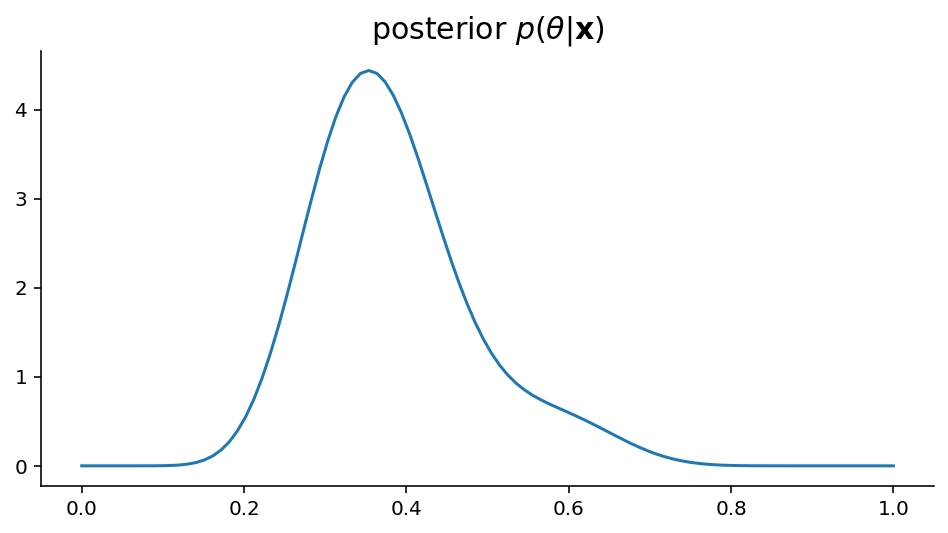

In [11]:
θ_range = np.linspace(0, 1, 100)
plt.plot(θ_range, p(θ_range, π1_post, π2_post, α1_post, α2_post, β1_post, β2_post))
plt.title(r"posterior $p(\theta\vert{\bf x})$", fontsize=15);

## Another exercise

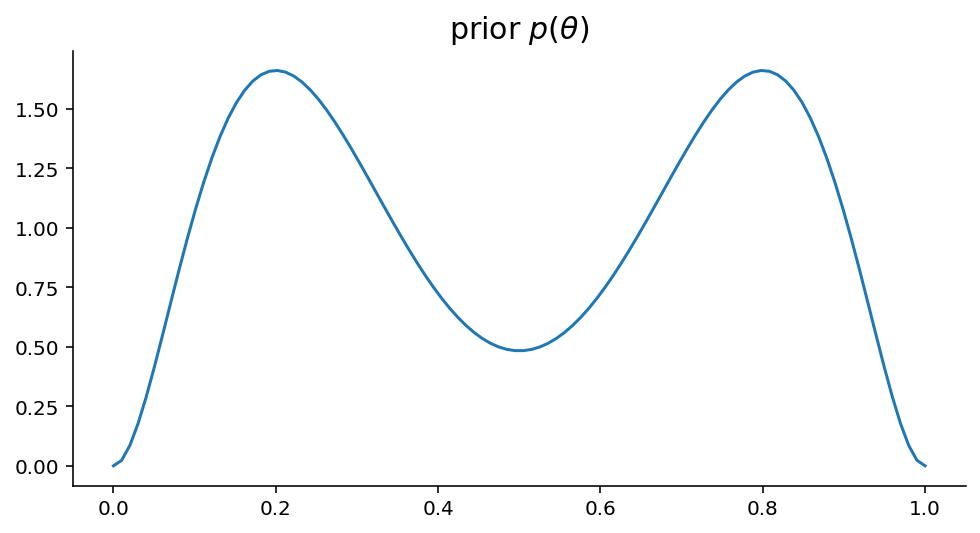

In [20]:
α1, β1 = 3, 9
α2, β2 = 9, 3

π1 = 0.5
π2 = 1 - π1

def p(θ, π1, π2, α1, α2, β1, β2):
    return π1 * beta(α1, α2).pdf(θ) + π2 * beta(α2, β2).pdf(θ)

θ_range = np.linspace(0, 1, 100)
plt.plot(θ_range, p(θ_range, π1, π2, α1, α2, β1, β2))
plt.title(r"prior $p(\theta)$", fontsize=15);

In [21]:
N = 5
Σxn = 17

In [25]:
α1_post = α1 + N
β1_post = β1 + Σxn - N

α1_post, β1_post

(8, 21)

In [27]:
α2_post = α2 + N
β2_post = β2 + Σxn - N

α2_post, β2_post

(14, 15)

In [38]:
p1 = gamma(12) * gamma(8) * gamma(21) / (gamma(9) * gamma(3) * gamma(29) )
p2 = gamma(12) * gamma(14) * gamma(15) / (gamma(9) * gamma(3) * gamma(29) )

π1_post = π1 * p1 / (π1 * p1 + π2 * p2)
π2_post = 1 - π1_post 

π1_post, π2_post

(0.9576045063741477, 0.042395493625852265)